In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("c:/users/nb-0242/desktop/hanhwa.csv",delimiter=',', dtype=np.float32)

In [3]:
data.shape

(5669, 6)

In [4]:
data = data[::-1]

In [5]:
def MinMaxScaler(data):
    bunja = data - np.min(data,0) #axis=0 이 행임
    bunmo = np.max(data,0) - np.min(data, 0)
    return bunja/bunmo+1e-10

In [6]:
data = MinMaxScaler(data)

In [7]:
x = data
y = data[:,[-1]]

In [8]:
seq_length = 7
data_dim = 6
hidden_dim = 10
output_dim = 1
learning_rate = 0.01

In [9]:
dataX= []
dataY= []
for i in range(len(x)-seq_length):
    x_ = x[i:i+seq_length]
    y_ = y[i+seq_length]
    dataX.append(x_)
    dataY.append(y_)

train_size = int(len(dataX)*0.7)
test_size = len(dataX)-train_size

train_x, test_x = np.array(dataX[0:train_size]) , np.array(dataX[train_size:])
train_y, test_y = np.array(dataY[0:train_size]) , np.array(dataY[train_size:])

In [33]:
print(np.array(data).shape)
print(np.array(dataX).shape)

(5669, 6)
(5662, 7, 6)


In [11]:
X = tf.placeholder(tf.float32, shape=[None,seq_length,data_dim])
Y = tf.placeholder(tf.float32, shape=[None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)

outputs, _states = tf.nn.dynamic_rnn(cell, X,dtype=tf.float32)
pred_y = tf.contrib.layers.fully_connected(inputs=outputs[:,-1], num_outputs=output_dim, 
                                           activation_fn=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(Y- pred_y)))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)



In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(100000):
    _, l = sess.run([train, loss], feed_dict={X:train_x, Y:train_y})
    
    if i % 5000 ==0:
        print("iter : %d , loss : %f"%(i, l))
        

iter : 0 , loss : 193.421280
iter : 5000 , loss : 6.676287
iter : 10000 , loss : 5.077354
iter : 15000 , loss : 4.617442
iter : 20000 , loss : 4.275858
iter : 25000 , loss : 4.207187
iter : 30000 , loss : 3.883274
iter : 35000 , loss : 3.840955
iter : 40000 , loss : 3.620184
iter : 45000 , loss : 3.649260
iter : 50000 , loss : 3.523381
iter : 55000 , loss : 3.344231
iter : 60000 , loss : 3.269317
iter : 65000 , loss : 3.243420
iter : 70000 , loss : 3.193464
iter : 75000 , loss : 3.105082
iter : 80000 , loss : 3.078030
iter : 85000 , loss : 3.068125
iter : 90000 , loss : 3.285403
iter : 95000 , loss : 3.232037


In [16]:
target = tf.placeholder(tf.float32,[None,1])
prediction = tf.placeholder(tf.float32,[None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(target-prediction)))

In [45]:
np.array(test_x).shape

(1699, 7, 6)

In [20]:
test_prediction = sess.run(pred_y, feed_dict={X:test_x})
print("rmse :", sess.run(rmse, feed_dict={target:test_y, prediction:test_prediction}))

rmse : 0.07170671


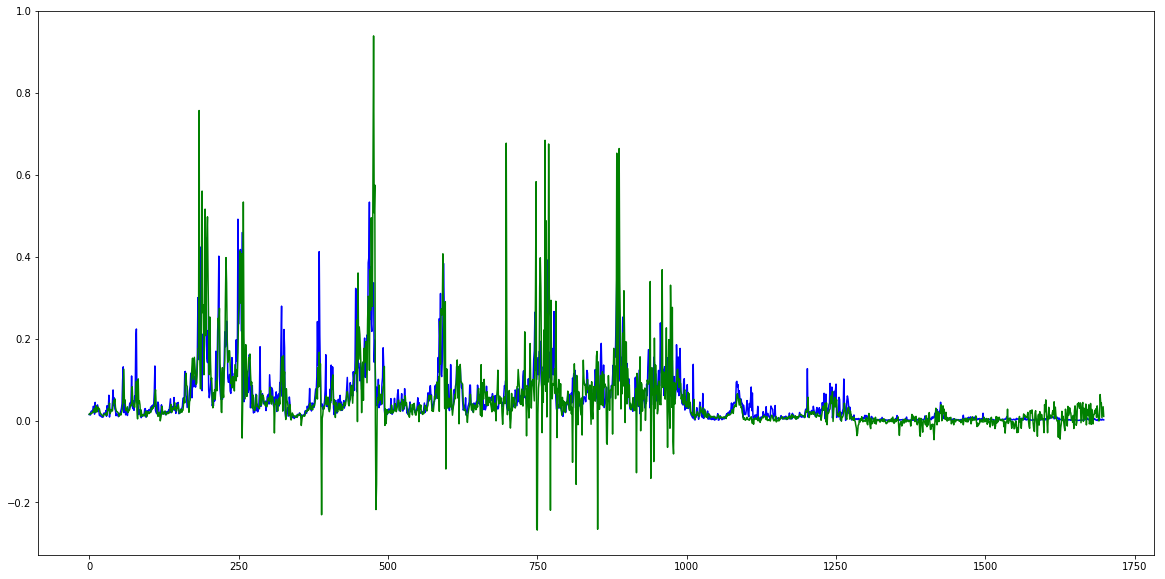

In [28]:
plt.figure(figsize=(20,10))
plt.plot(test_y, color='b')
plt.plot(test_prediction, color='g')


In [6]:
#서버에서 갖고온거 시각화만 ㅎ
res = np.loadtxt("c:/users/nb-0242/desktop/result.csv",delimiter=',', dtype=np.float32)
test = np.loadtxt("c:/users/nb-0242/desktop/test_y.csv",delimiter=',', dtype=np.float32)

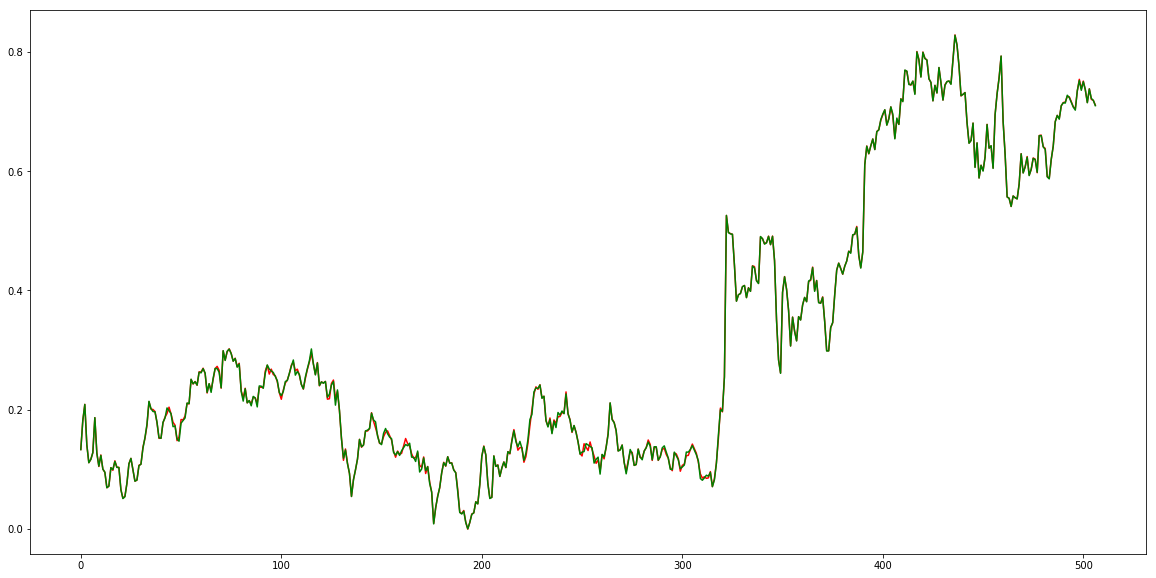

In [13]:
plt.figure(figsize=(20,10))
plt.plot(res, color='r')
plt.plot(test, color='g')

#트레인은 오버피팅 기가막힘 ㅎ